# Rice Integration

In [1]:
rm(list=ls())
setwd("/hpc/group/pbenfeylab/CheWei/")

In [2]:
suppressMessages(library(Seurat))
suppressMessages(library(tidyverse))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(data.table))
suppressMessages(library(RColorBrewer))
#suppressMessages(library(OneR))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”


In [3]:
sessionInfo() # New DCC env

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Stream 8

Matrix products: default
BLAS/LAPACK: /hpc/group/pbenfeylab/ch416/miniconda3/envs/seu4/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-3 data.table_1.14.8  cowplot_1.1.1      forcats_0.5.2     
 [5] stringr_1.5.0      dplyr_1.1.1        purrr_1.0.1        readr_2.1.3       
 [9] tidyr_1.3.0        tibble_3.2.1       ggplot2_3.4.2      tidyverse_1.3.2   
[13] SeuratObject_4.1.3 Seurat_4.1.1.9001 

loaded 

## Label Transferred 

In [4]:
sc_199 <- readRDS("./scRNA-seq/Seurat_Objects/sc_199_COPILOT_seu4.rds")
sc_200 <- readRDS("./scRNA-seq/Seurat_Objects/sc_200_COPILOT_seu4.rds")
sc_201 <- readRDS("./scRNA-seq/Seurat_Objects/sc_201_COPILOT_seu4.rds")
sc_202 <- readRDS("./scRNA-seq/Seurat_Objects/sc_202_COPILOT_seu4.rds")

## Check the label transfer score

In [52]:
scn_g <- sc_199$prediction.score.Stem.Cell.Niche[which(sc_199$celltype.anno.gel12S=="Stem Cell Niche")]
scl_g <- sc_199$prediction.score.Sclerenchyma[which(sc_199$celltype.anno.gel12S=="Sclerenchyma")]
rc_g <- sc_199$prediction.score.Root.Cap[which(sc_199$celltype.anno.gel12S=="Root Cap")]
atri_g <- sc_199$prediction.score.Atrichoblast[which(sc_199$celltype.anno.gel12S=="Atrichoblast")]
tri_g <- sc_199$prediction.score.Trichoblast[which(sc_199$celltype.anno.gel12S=="Trichoblast")]
cor_g <- sc_199$prediction.score.Cortex[which(sc_199$celltype.anno.gel12S=="Cortex")]
end_g <- sc_199$prediction.score.Endodermis[which(sc_199$celltype.anno.gel12S=="Endodermis")]
phl_g <- sc_199$prediction.score.Phloem[which(sc_199$celltype.anno.gel12S=="Phloem")]
per_g <- sc_199$prediction.score.Pericycle[which(sc_199$celltype.anno.gel12S=="Pericycle")]
exo_g <- sc_199$prediction.score.Exodermis[which(sc_199$celltype.anno.gel12S=="Exodermis")]
pxyl_g <- sc_199$prediction.score.Protoxylem[which(sc_199$celltype.anno.gel12S=="Protoxylem")]
mxyl_g <- sc_199$prediction.score.Metaxylem[which(sc_199$celltype.anno.gel12S=="Metaxylem")]

In [53]:
dat <- data.frame(celltype=c(rep("Stem Cell Niche",length(scn_g)),rep("Sclerenchyma",length(scl_g)),
                            rep("Root Cap",length(rc_g)),rep("Atrichoblast",length(atri_g)),
                            rep("Trichoblast",length(tri_g)),rep("Cortex",length(cor_g)),
                            rep("Endodermis",length(end_g)),rep("Phloem",length(phl_g)),
                            rep("Pericycle",length(per_g)),rep("Exodermis",length(exo_g)),
                            rep("Protoxylem",length(pxyl_g)),rep("Metaxylem",length(mxyl_g))), prediction_score=c(scn_g, scl_g, rc_g, atri_g, tri_g, cor_g, end_g, phl_g, per_g, exo_g, pxyl_g, mxyl_g))

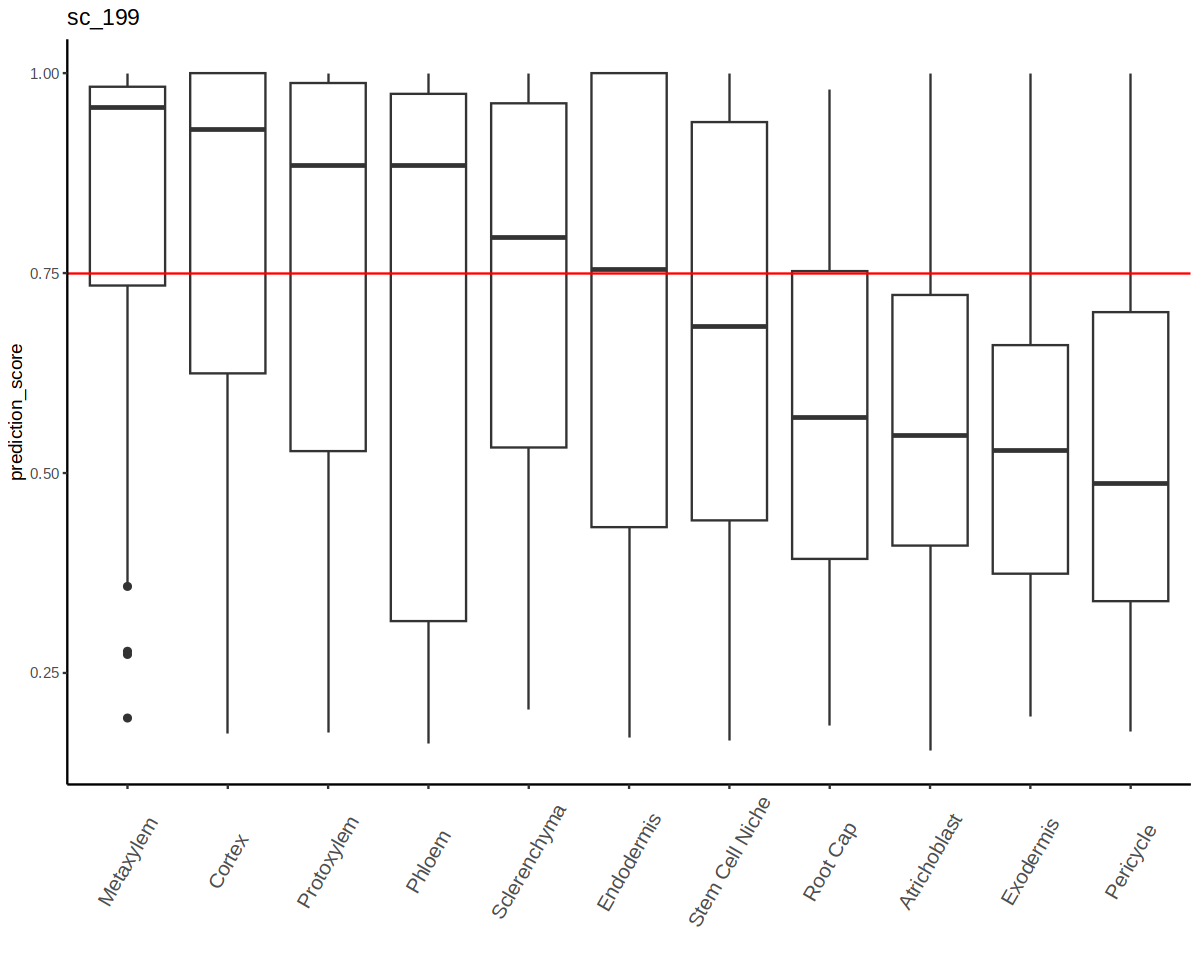

In [54]:
ggplot(dat,aes(x=fct_reorder(celltype, prediction_score, median, .desc =TRUE), y=prediction_score)) + 
    geom_boxplot()+ 
    geom_hline(yintercept = 0.75, col = "red")+
    theme_classic() +
    theme(legend.position = "none") +
    xlab("") + ggtitle("sc_199")+ theme(axis.text.x = element_text(size=12,,angle = 60, vjust = 0.5, hjust=0.5))

In [55]:
scn_g <- sc_200$prediction.score.Stem.Cell.Niche[which(sc_200$celltype.anno.gel12S=="Stem Cell Niche")]
scl_g <- sc_200$prediction.score.Sclerenchyma[which(sc_200$celltype.anno.gel12S=="Sclerenchyma")]
rc_g <- sc_200$prediction.score.Root.Cap[which(sc_200$celltype.anno.gel12S=="Root Cap")]
atri_g <- sc_200$prediction.score.Atrichoblast[which(sc_200$celltype.anno.gel12S=="Atrichoblast")]
tri_g <- sc_200$prediction.score.Trichoblast[which(sc_200$celltype.anno.gel12S=="Trichoblast")]
cor_g <- sc_200$prediction.score.Cortex[which(sc_200$celltype.anno.gel12S=="Cortex")]
end_g <- sc_200$prediction.score.Endodermis[which(sc_200$celltype.anno.gel12S=="Endodermis")]
phl_g <- sc_200$prediction.score.Phloem[which(sc_200$celltype.anno.gel12S=="Phloem")]
per_g <- sc_200$prediction.score.Pericycle[which(sc_200$celltype.anno.gel12S=="Pericycle")]
exo_g <- sc_200$prediction.score.Exodermis[which(sc_200$celltype.anno.gel12S=="Exodermis")]
pxyl_g <- sc_200$prediction.score.Protoxylem[which(sc_200$celltype.anno.gel12S=="Protoxylem")]
mxyl_g <- sc_200$prediction.score.Metaxylem[which(sc_200$celltype.anno.gel12S=="Metaxylem")]

In [56]:
dat <- data.frame(celltype=c(rep("Stem Cell Niche",length(scn_g)),rep("Sclerenchyma",length(scl_g)),
                            rep("Root Cap",length(rc_g)),rep("Atrichoblast",length(atri_g)),
                            rep("Trichoblast",length(tri_g)),rep("Cortex",length(cor_g)),
                            rep("Endodermis",length(end_g)),rep("Phloem",length(phl_g)),
                            rep("Pericycle",length(per_g)),rep("Exodermis",length(exo_g)),
                            rep("Protoxylem",length(pxyl_g)),rep("Metaxylem",length(mxyl_g))), prediction_score=c(scn_g, scl_g, rc_g, atri_g, tri_g, cor_g, end_g, phl_g, per_g, exo_g, pxyl_g, mxyl_g))

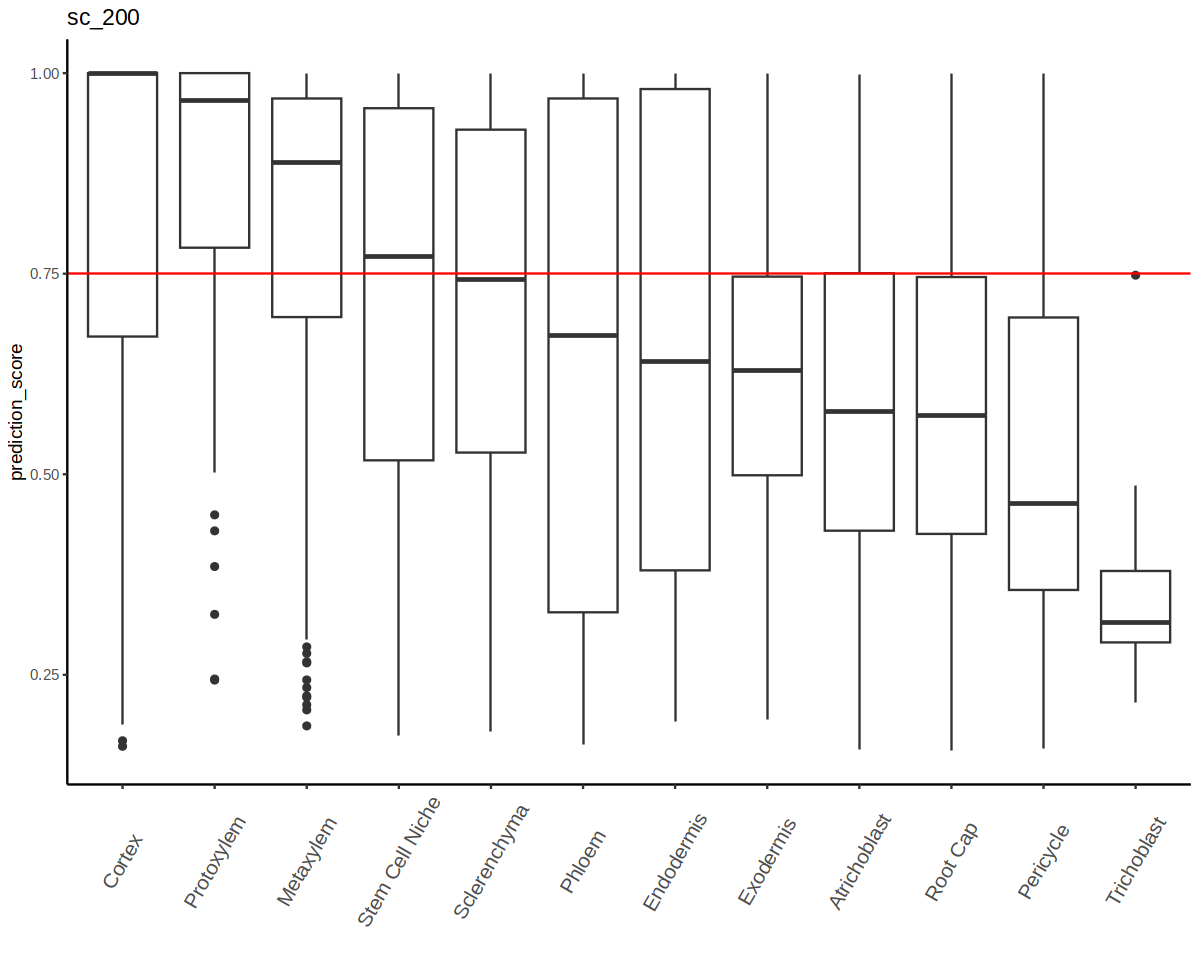

In [57]:
ggplot(dat,aes(x=fct_reorder(celltype, prediction_score, median, .desc =TRUE), y=prediction_score)) + 
    geom_boxplot()+ 
    geom_hline(yintercept = 0.75, col = "red")+
    theme_classic() +
    theme(legend.position = "none") +
    xlab("") + ggtitle("sc_200")+ theme(axis.text.x = element_text(size=12,,angle = 60, vjust = 0.5, hjust=0.5))

In [58]:
scn_g <- sc_201$prediction.score.Stem.Cell.Niche[which(sc_201$celltype.anno.gel12S=="Stem Cell Niche")]
scl_g <- sc_201$prediction.score.Sclerenchyma[which(sc_201$celltype.anno.gel12S=="Sclerenchyma")]
rc_g <- sc_201$prediction.score.Root.Cap[which(sc_201$celltype.anno.gel12S=="Root Cap")]
atri_g <- sc_201$prediction.score.Atrichoblast[which(sc_201$celltype.anno.gel12S=="Atrichoblast")]
tri_g <- sc_201$prediction.score.Trichoblast[which(sc_201$celltype.anno.gel12S=="Trichoblast")]
cor_g <- sc_201$prediction.score.Cortex[which(sc_201$celltype.anno.gel12S=="Cortex")]
end_g <- sc_201$prediction.score.Endodermis[which(sc_201$celltype.anno.gel12S=="Endodermis")]
phl_g <- sc_201$prediction.score.Phloem[which(sc_201$celltype.anno.gel12S=="Phloem")]
per_g <- sc_201$prediction.score.Pericycle[which(sc_201$celltype.anno.gel12S=="Pericycle")]
exo_g <- sc_201$prediction.score.Exodermis[which(sc_201$celltype.anno.gel12S=="Exodermis")]
pxyl_g <- sc_201$prediction.score.Protoxylem[which(sc_201$celltype.anno.gel12S=="Protoxylem")]
mxyl_g <- sc_201$prediction.score.Metaxylem[which(sc_201$celltype.anno.gel12S=="Metaxylem")]

In [59]:
dat <- data.frame(celltype=c(rep("Stem Cell Niche",length(scn_g)),rep("Sclerenchyma",length(scl_g)),
                            rep("Root Cap",length(rc_g)),rep("Atrichoblast",length(atri_g)),
                            rep("Trichoblast",length(tri_g)),rep("Cortex",length(cor_g)),
                            rep("Endodermis",length(end_g)),rep("Phloem",length(phl_g)),
                            rep("Pericycle",length(per_g)),rep("Exodermis",length(exo_g)),
                            rep("Protoxylem",length(pxyl_g)),rep("Metaxylem",length(mxyl_g))), prediction_score=c(scn_g, scl_g, rc_g, atri_g, tri_g, cor_g, end_g, phl_g, per_g, exo_g, pxyl_g, mxyl_g))

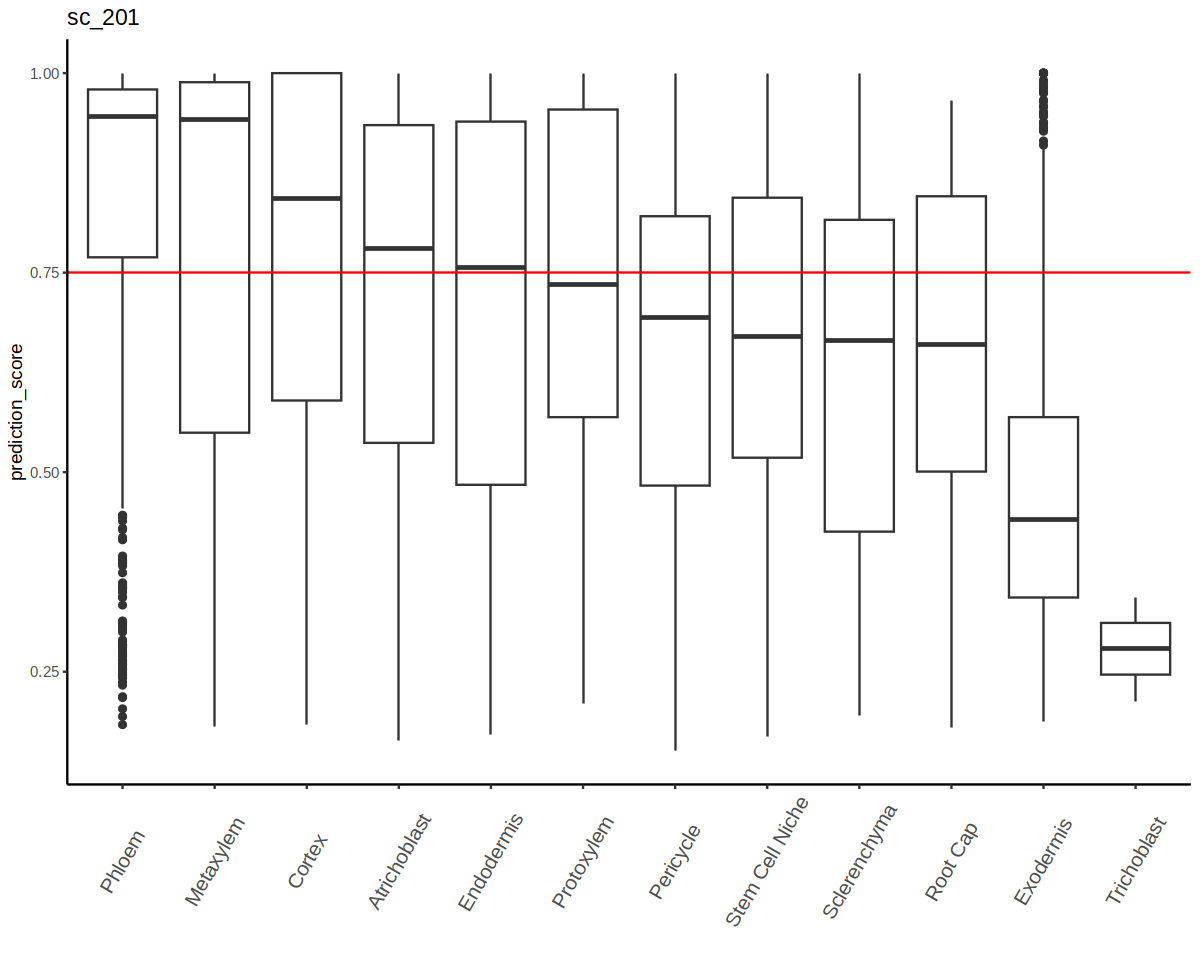

In [60]:
ggplot(dat,aes(x=fct_reorder(celltype, prediction_score, median, .desc =TRUE), y=prediction_score)) + 
    geom_boxplot()+ 
    geom_hline(yintercept = 0.75, col = "red")+
    theme_classic() +
    theme(legend.position = "none") +
    xlab("") + ggtitle("sc_201")+ theme(axis.text.x = element_text(size=12,,angle = 60, vjust = 0.5, hjust=0.5))

In [61]:
scn_g <- sc_202$prediction.score.Stem.Cell.Niche[which(sc_202$celltype.anno.gel12S=="Stem Cell Niche")]
scl_g <- sc_202$prediction.score.Sclerenchyma[which(sc_202$celltype.anno.gel12S=="Sclerenchyma")]
rc_g <- sc_202$prediction.score.Root.Cap[which(sc_202$celltype.anno.gel12S=="Root Cap")]
atri_g <- sc_202$prediction.score.Atrichoblast[which(sc_202$celltype.anno.gel12S=="Atrichoblast")]
tri_g <- sc_202$prediction.score.Trichoblast[which(sc_202$celltype.anno.gel12S=="Trichoblast")]
cor_g <- sc_202$prediction.score.Cortex[which(sc_202$celltype.anno.gel12S=="Cortex")]
end_g <- sc_202$prediction.score.Endodermis[which(sc_202$celltype.anno.gel12S=="Endodermis")]
phl_g <- sc_202$prediction.score.Phloem[which(sc_202$celltype.anno.gel12S=="Phloem")]
per_g <- sc_202$prediction.score.Pericycle[which(sc_202$celltype.anno.gel12S=="Pericycle")]
exo_g <- sc_202$prediction.score.Exodermis[which(sc_202$celltype.anno.gel12S=="Exodermis")]
pxyl_g <- sc_202$prediction.score.Protoxylem[which(sc_202$celltype.anno.gel12S=="Protoxylem")]
mxyl_g <- sc_202$prediction.score.Metaxylem[which(sc_202$celltype.anno.gel12S=="Metaxylem")]

In [62]:
dat <- data.frame(celltype=c(rep("Stem Cell Niche",length(scn_g)),rep("Sclerenchyma",length(scl_g)),
                            rep("Root Cap",length(rc_g)),rep("Atrichoblast",length(atri_g)),
                            rep("Trichoblast",length(tri_g)),rep("Cortex",length(cor_g)),
                            rep("Endodermis",length(end_g)),rep("Phloem",length(phl_g)),
                            rep("Pericycle",length(per_g)),rep("Exodermis",length(exo_g)),
                            rep("Protoxylem",length(pxyl_g)),rep("Metaxylem",length(mxyl_g))), prediction_score=c(scn_g, scl_g, rc_g, atri_g, tri_g, cor_g, end_g, phl_g, per_g, exo_g, pxyl_g, mxyl_g))

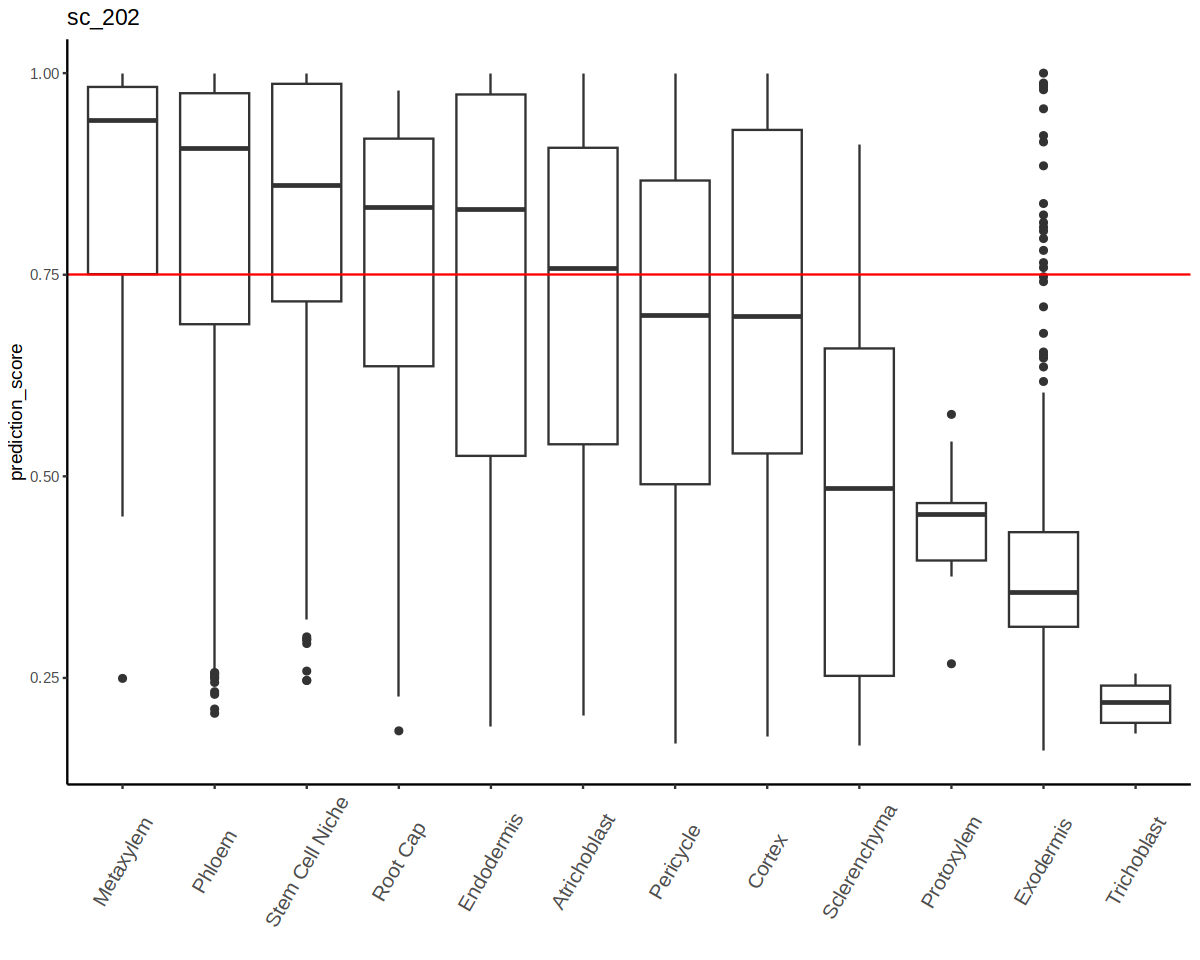

In [63]:
ggplot(dat,aes(x=fct_reorder(celltype, prediction_score, median, .desc =TRUE), y=prediction_score)) + 
    geom_boxplot()+ 
    geom_hline(yintercept = 0.75, col = "red")+
    theme_classic() +
    theme(legend.position = "none") +
    xlab("") + ggtitle("sc_202") + theme(axis.text.x = element_text(size=12,,angle = 60, vjust = 0.5, hjust=0.5))